In [ ]:
!pip install gradio

#Step 1: Importing all the packages

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.15.0


#Step 2: Loading your data from disk for training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/CP2")

In [ ]:
# !pip install patool
# import patoolib
# patoolib.extract_archive("train.rar")
# patoolib.extract_archive("test_examples.zip")

In [ ]:
!dir

flagged  model_CNN.h5  test_examples  test_examples.zip  train	train.rar  Vegetable_CNN.ipynb


#Step 3:Built CNN Model

In [ ]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, w, channel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(80, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Third set of CONV => RELU => POOL layers
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # forth set of CONV => RELU => POOL layers
        model.add(Conv2D(250, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


In [ ]:
DATASET = "/content/drive/MyDrive/CP2/train"  # this folde must contain three subfolder with images
MODEL = "Scene.model" #name to store the model on disk
PLOT = "plot.png" #plot name

In [ ]:
#initialize the data and labels
print("[INFO] loadings images...")
data = []
labels = []

#grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)
#progress bar
with tqdm(total=len(imagePaths)) as pbar:

    #loop over theinput images
    for idx, imagePath in enumerate(imagePaths):
        #load the image ,pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        #extract the class label from the image path and update the
        #label list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Bean":
            label = 0
        elif label == "Bitter_Gourd":
            label = 1
        elif label == "Bottle_Gourd":
            label = 2
        elif label == "Brinjal":
            label = 3
        elif label == "Broccoli":
            label = 4
        elif label == "Cabbage":
            label = 5
        elif label == "Capsicum":
            label = 6
        elif label == "Carrot":
            label = 7
        elif label == "Cauliflower":
            label = 8
        elif label == "Cucumber":
            label = 9
        elif label == "Papaya":
            label = 10
        elif label == "Potato":
            label = 11
        elif label == "Pumpkin":
            label = 12
        elif label == "Radish":
            label = 13
        elif label == "Tomato":
            label = 14


        labels.append(label)

        #update the progressbar
        pbar.update(1)


[INFO] loadings images...


  0%|          | 0/7500 [00:00<?, ?it/s]

In [ ]:
data[0].shape

(28, 28, 3)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.25, random_state=42)

In [ ]:
trainX.shape

(5625, 28, 28, 3)

In [ ]:
trainY.shape

(5625,)

#Label Encoder

##One hot encoder

In [ ]:
trainY = to_categorical(trainY, num_classes=15) #converting classes name into numaric
testY = to_categorical(testY, num_classes=15)

In [ ]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

#Step 4:Data Augmentation

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [ ]:
INIT_LR = 1e-3
BS = 32
#initialize the model
print("[INFO] compliling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=15)
opt = Adam(lr=INIT_LR) #using Adam optimizer

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")


[INFO] compliling model...


[INFO] model complied...


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        3800      
                                                                 
 activation (Activation)     (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 80)        100080    
                                                                 
 activation_1 (Activation)   (None, 14, 14, 80)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 80)          0         
 g2D)                                                   

#Step 5:Training and Validating the Model

In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX)//BS,
              epochs=50,
              verbose=1)

[INFO] training network...
Epoch 1/50
175/175 [==============================] - 9s 25ms/step - loss: 2.1459 - accuracy: 0.2380 - val_loss: 1.7491 - val_accuracy: 0.3653
Epoch 2/50
175/175 [==============================] - 4s 22ms/step - loss: 1.6329 - accuracy: 0.4096 - val_loss: 1.5530 - val_accuracy: 0.4128
Epoch 3/50
175/175 [==============================] - 4s 23ms/step - loss: 1.4338 - accuracy: 0.4942 - val_loss: 1.2363 - val_accuracy: 0.5712
Epoch 4/50
175/175 [==============================] - 4s 22ms/step - loss: 1.2441 - accuracy: 0.5666 - val_loss: 1.3227 - val_accuracy: 0.5520
Epoch 5/50
175/175 [==============================] - 5s 29ms/step - loss: 1.0889 - accuracy: 0.6320 - val_loss: 0.9736 - val_accuracy: 0.6693
Epoch 6/50
175/175 [==============================] - 4s 22ms/step - loss: 0.8780 - accuracy: 0.6991 - val_loss: 0.9621 - val_accuracy: 0.6821
Epoch 7/50
175/175 [==============================] - 4s 21ms/step - loss: 0.7804 - accuracy: 0.7356 - val_loss: 0.

#Step 6:Generate Plots for acc and val

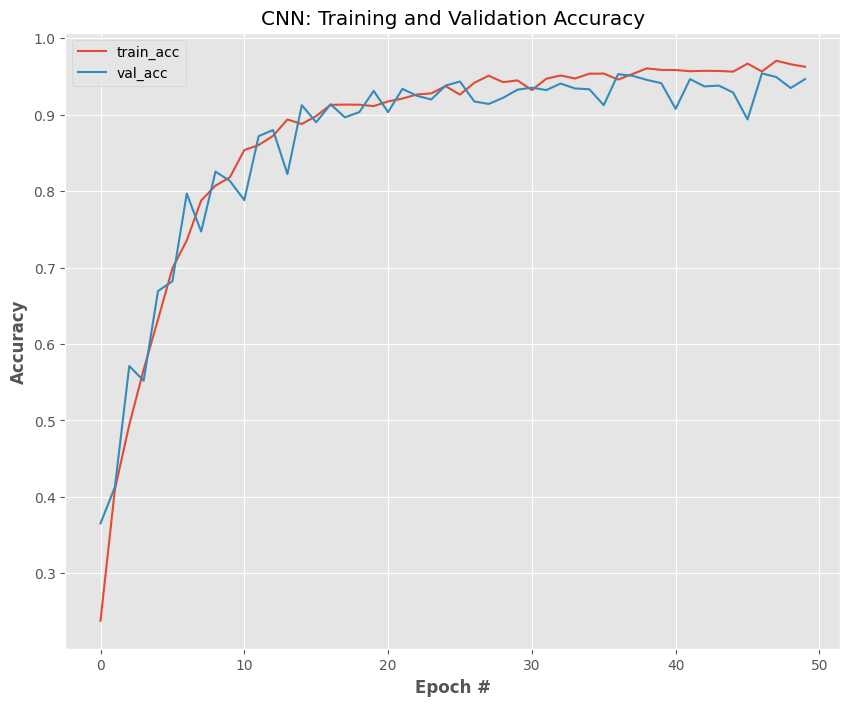

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch 50", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

##The training and validation loss

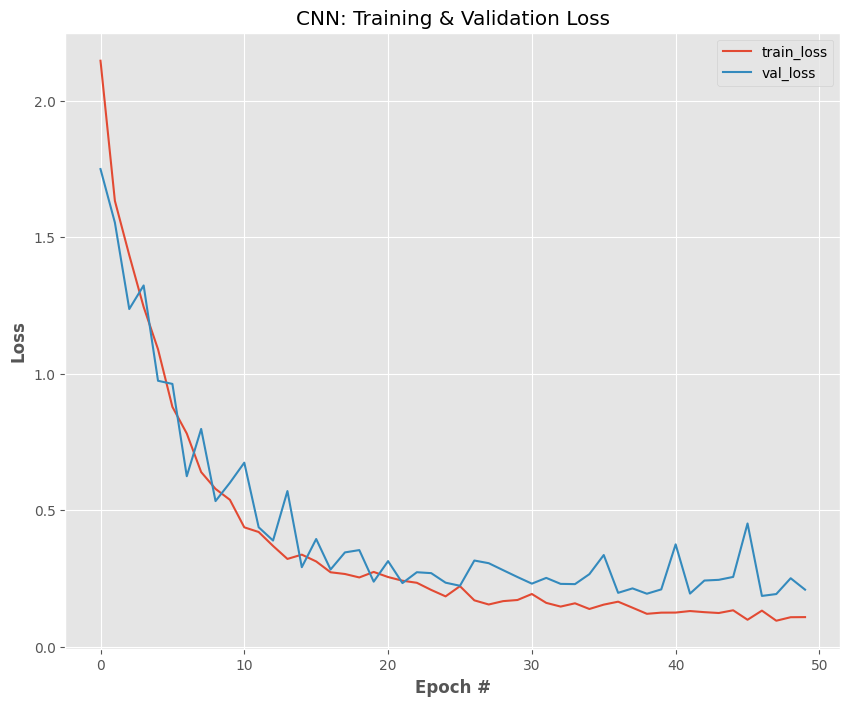

In [ ]:
# plot the training and validation loss
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch 50", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

#Step 7:Saving the Model

In [ ]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('model_CNN.h5')

[INFO] serializing network and label binarizer...


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils import paths
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    #plt.grid(b=None)
    ax = fig.add_subplot(111)

    ax.imshow(img)

In [ ]:
from tqdm import tqdm

#Step 8:Checking on Test Data

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test_examples')))   # data folder with 2 categorical folders

all_class = ["Bean", "Bitter_Gourd", "Bottle_Gourd", "Brinjal", "Broccoli", "Cabbage", "Capsicum", "Carrot",
           "Cauliflower", "Cucumber", "Papaya", "Potato", "Pumpkin", "Radish", "Tomato"]


# progress bar
with tqdm(total=len(testImagePaths)) as pbar:

    for imagePath in testImagePaths:

        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf= model.predict(image)[0] # [[0.1 , 0.8 , 0.1]]
        print(prd_conf)

        # build the label
        label = all_class[np.argmax(prd_conf)] #[b f s]-> f
        proba = prd_conf[np.argmax(prd_conf)] # [0.1 , 0.8 , 0.1]  -> 0.8

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)

        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

#Deployment

In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image

    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)


    preds = model.predict(image)[0]
    result = dict()
    result["Bean"] = round(float(list(preds)[0]), 15)
    result["Bitter_Gourd"] = round(float(list(preds)[1]), 15)
    result["Bottle_Gourd"] = round(float(list(preds)[2]), 15)
    result["Brinjal"] = round(float(list(preds)[3]), 15)
    result["Broccoli"] = round(float(list(preds)[4]), 15)
    result["Cabbage"] = round(float(list(preds)[5]), 15)
    result["Capsicum"] = round(float(list(preds)[6]), 15)
    result["Carrot"] = round(float(list(preds)[7]), 15)
    result["Cauliflower"] = round(float(list(preds)[8]), 15)
    result["Cucumber"] = round(float(list(preds)[9]), 15)
    result["Papaya"] = round(float(list(preds)[10]), 15)
    result["Potato"] = round(float(list(preds)[11]), 15)
    result["Pumpkin"] = round(float(list(preds)[12]), 15)
    result["Radish"] = round(float(list(preds)[13]), 15)
    result["Tomato"] = round(float(list(preds)[14]), 15)

    print(result)

    return result

# Create Gradio interface with image input and label output
iface = gr.Interface(fn=predict_image, inputs="image", outputs="label", title="CNN")
iface.launch(share=True)